In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

In [3]:
con=sqlite3.connect("/Users/jaymistry/2.Password Strength--_ .Natural Language Processing/password_data.sqlite")

In [4]:
data=pd.read_sql_query("SELECT * from Users",con)

In [5]:
data.head(4)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2


In [6]:
data.shape

(100000, 3)

In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

In [8]:
data.drop(["index"],axis=1,inplace=True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().any().sum()

0

In [11]:
data.dtypes

password    object
strength     int64
dtype: object

In [12]:
data["strength"].unique()

array([1, 2, 0])

In [13]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [14]:
data[data["password"].str.isnumeric()].shape #only 26 rows have only numeric passwords

(26, 2)

In [15]:
data["password"].str.isupper()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [16]:
data[data["password"].str.isupper()].shape

(1506, 2)

In [17]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [18]:
data[data["password"].str.istitle()].shape

(932, 2)

In [19]:
import string

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def find_semantics(row):
    for character in row:
        if character in string.punctuation:
            return 1
        else:
            pass

In [22]:
data[data["password"].apply(find_semantics)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [23]:
data["length"]=data["password"].str.len()

In [24]:
def freq_lowercase(row):
    return len([char for char in row if char.lower()])/len(row)

In [25]:
def freq_uppercase(row):
    return len([char for char in row if char.upper()])/len(row)

In [26]:
def freq_numerical_case(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [27]:
data["lowercase_freq"]=np.round(data["password"].apply(freq_lowercase),3)

data["uppercase_freq"]=np.round(data["password"].apply(freq_uppercase),3)

data["digit_freq"]=np.round(data["password"].apply(freq_numerical_case),3)

In [28]:
data.head(2)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq
0,zxe870819,1,9,1.0,1.0,0.667
1,xw46454nr23l,1,12,1.0,1.0,0.583


In [29]:
def freq_special_case(row):
    special_chars=[]
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [30]:
data["special_char_freq"]=np.round(data["password"].apply(freq_special_case),3)

In [31]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,1.0,1.0,0.667,0
1,xw46454nr23l,1,12,1.0,1.0,0.583,0
2,soporte13,1,9,1.0,1.0,0.222,0
3,accounts6000webhost.com,2,23,1.0,1.0,0.174,1
4,c443balg,1,8,1.0,1.0,0.375,0


In [32]:
data["special_char_freq"]=data["special_char_freq"]/data["length"]

In [33]:
data.head(5)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
0,zxe870819,1,9,1.0,1.0,0.667,0.000000
1,xw46454nr23l,1,12,1.0,1.0,0.583,0.000000
2,soporte13,1,9,1.0,1.0,0.222,0.000000
3,accounts6000webhost.com,2,23,1.0,1.0,0.174,0.043478
4,c443balg,1,8,1.0,1.0,0.375,0.000000


In [34]:
data[['length','strength']].groupby(['strength']).agg(['min','max','mean','median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [35]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [36]:
columns=['length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq']

for col in columns:
    print(col)
    print(data[[col,'strength']].groupby(['strength']).agg(['min','max','mean','median']))
    print("\n")

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                 
                    min  max mean median
strength                                
0                   1.0  1.0  1.0    1.0
1                   1.0  1.0  1.0    1.0
2                   1.0  1.0  1.0    1.0


uppercase_freq
         uppercase_freq                 
                    min  max mean median
strength                                
0                   1.0  1.0  1.0    1.0
1                   1.0  1.0  1.0    1.0
2                   1.0  1.0  1.0    1.0


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0               0.0  1.000  0.275383  0.286
1               0.0  0.923  0.360123  0.333


In [37]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

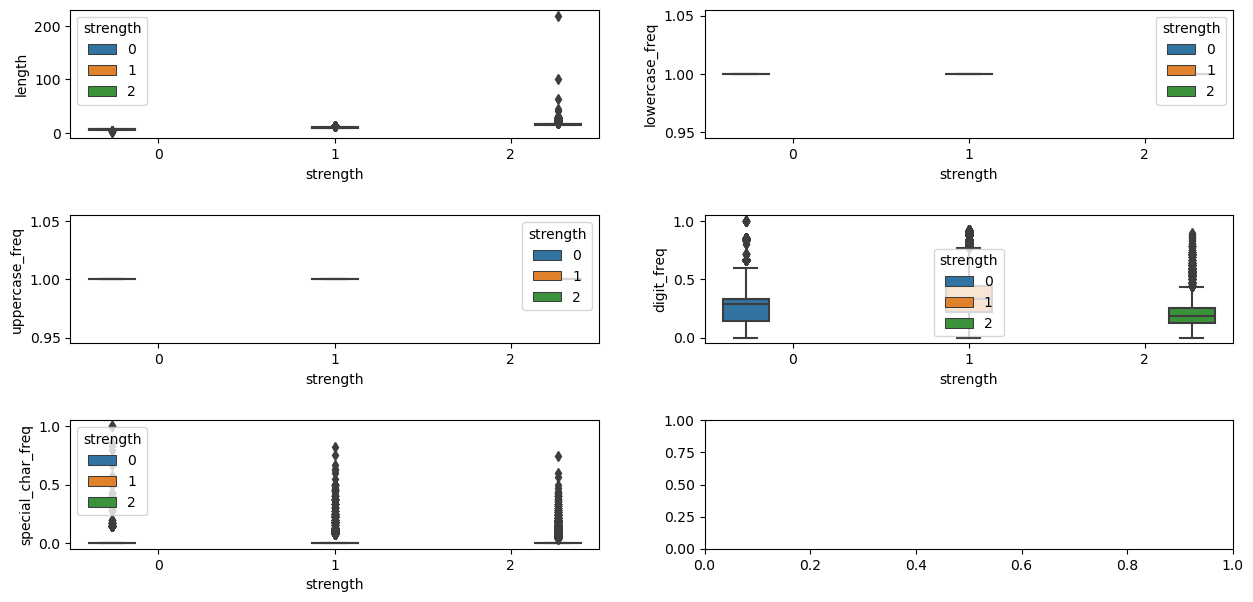

In [38]:
fig ,((ax1,ax2), (ax3,ax4), (ax5,ax6))=plt.subplots(3,2,figsize=(15,7))
sns.boxplot(x='strength',y='length',hue='strength',ax=ax1,data=data)
sns.boxplot(x='strength',y='lowercase_freq',hue='strength',ax=ax2,data=data)
sns.boxplot(x='strength',y='uppercase_freq',hue='strength',ax=ax3,data=data)
sns.boxplot(x='strength',y='digit_freq',hue='strength',ax=ax4,data=data)
sns.boxplot(x='strength',y='special_char_freq',hue='strength',ax=ax5,data=data)

plt.subplots_adjust(hspace=0.6)

In [39]:
#Performing Univariate Analysis to identify the most important features.

In [40]:
def get_dist(data,feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.violinplot(x='strength',y=feature, data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],color="red", label="0", hist=False)
    sns.distplot(data[data['strength']==1][feature],color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature],color="orange", label="2", hist=False)
    plt.legend()
    plt.show()

In [41]:
data.columns
# get_dist(data,"length")

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [42]:
from warnings import filterwarnings
filterwarnings("ignore")

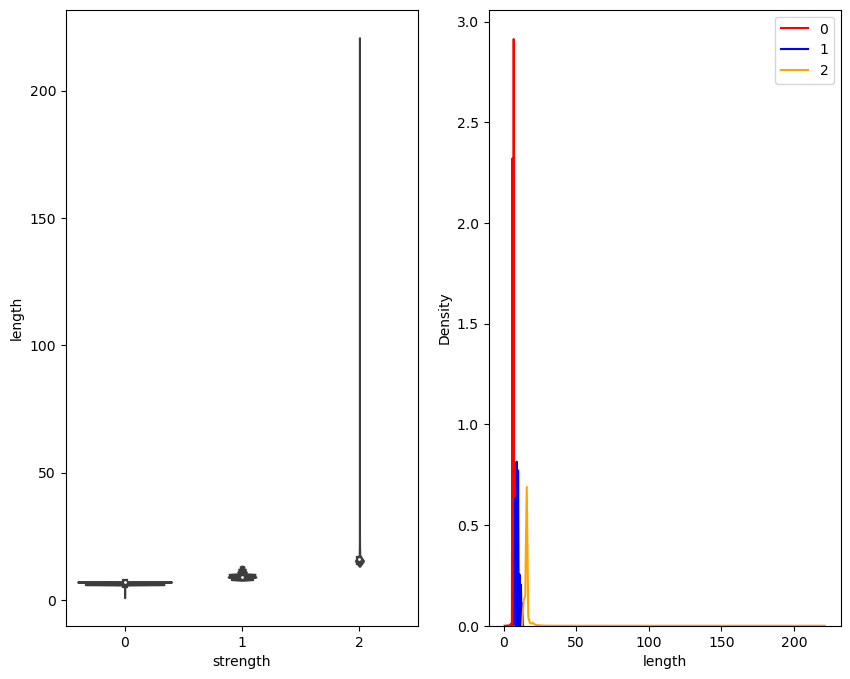

In [43]:
get_dist(data,'length')

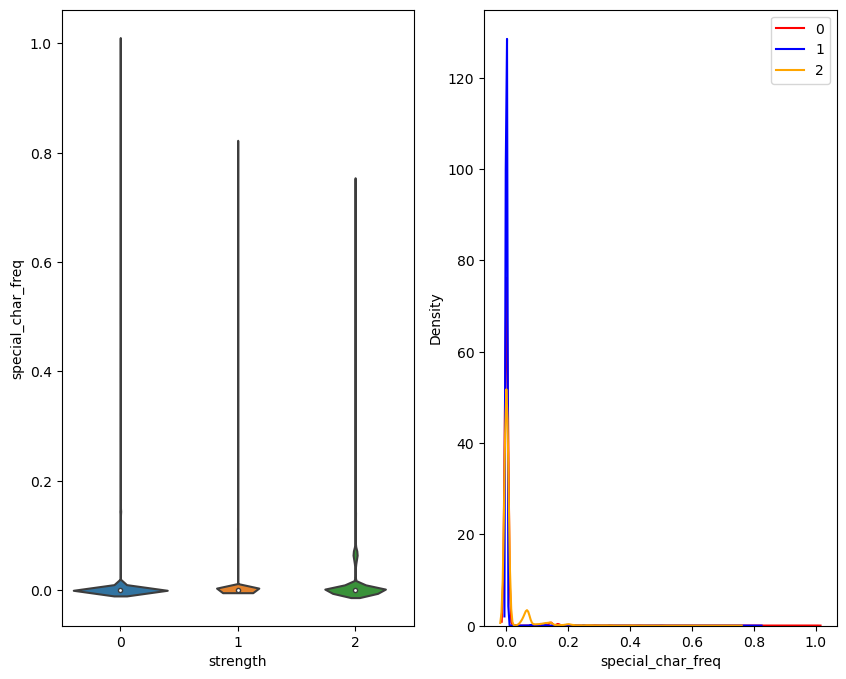

In [44]:
get_dist(data,"special_char_freq")

In [45]:
data.sample(frac=1)

,password,strength,length,lowercase_freq,uppercase_freq,digit_freq,special_char_freq
33271,makc483143,1,10,1.0,1.0,0.600,0.0
45216,acgevohrb1,1,10,1.0,1.0,0.100,0.0
8151,gabriel26,1,9,1.0,1.0,0.222,0.0
55760,sasa12,0,6,1.0,1.0,0.333,0.0
41765,kartal1983,1,10,1.0,1.0,0.400,0.0
...,...,...,...,...,...,...,...
47104,barodvinay22,1,12,1.0,1.0,0.167,0.0
22049,2013Aguswijaya,2,14,1.0,1.0,0.286,0.0
1235,qwdavgn120,1,10,1.0,1.0,0.300,0.0
9093,adh9tsb,0,7,1.0,1.0,0.143,0.0


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer=TfidfVectorizer(analyzer="char")

In [48]:
x=list(data["password"])

In [49]:
X=vectorizer.fit_transform(x)

In [50]:
X.shape

(100000, 99)

In [51]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [52]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27146449, 0.20826259, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.31465019, 0.60976358, 0.29118163,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.23495232, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.38041451, 0.        , 0.35694933, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [53]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [54]:
df2=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())

In [55]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [57]:
df2["length"]=data["length"]

In [58]:
df2["lowercase_freq"]=data["lowercase_freq"]

In [59]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,1.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,1.0


In [60]:
from sklearn.model_selection import train_test_split
y=data["strength"]

In [61]:
X_train,X_test,y_train,y_test=train_test_split(df2,y,test_size=0.2)

In [62]:
X_train.shape

(80000, 101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf=LogisticRegression(multi_class='multinomial')

In [65]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [66]:
y_pred=clf.predict(X_test)

In [67]:
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [68]:
from collections import Counter

In [69]:
Counter(y_pred)

Counter({1: 14733, 0: 2793, 2: 2474})

In [70]:
password="%@123abcd"

In [71]:
sample_array=np.array([password])

In [72]:
sample_matrix=vectorizer.transform(sample_array)

In [73]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [74]:
sample_matrix.toarray().shape

(1, 99)

In [75]:
l1=len(password)

In [76]:
n1=len([char for char in password if char.islower()])/len(password)

In [77]:
sample_matrix=np.append(sample_matrix.toarray(),(l1,n1))

In [78]:
sample_matrix=sample_matrix.reshape(1,101)

In [79]:
prediction=clf.predict(sample_matrix)

In [80]:
prediction[0]

1

In [81]:
def predict():
    password=input("Enter a new password that you want to predict:")
    sample_array=np.array([password])
    sample_array=vectorizer.transform(sample_array)
    length_pass=len(password)
    num_lower=len([char for char in password if char.islower()])/len(password)
    sample_array=np.append(sample_array.toarray(),(l1,n1))
    sample_array=sample_array.reshape(1,101)
    prediction=clf.predict(sample_array)
    if prediction==0:
        print("Password is weak")
    elif prediction==1:
        print("Password is normal")
    else:
        print("Password is strong")

In [82]:
predict()

Enter a new password that you want to predict:$123abc^981kjhafsjsf
Password is normal


In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [84]:
accuracy_score(y_test,y_pred)

0.99995

In [85]:
confusion_matrix(y_test,y_pred)

array([[ 2793,     0,     0],
       [    0, 14732,     0],
       [    0,     1,  2474]])

In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2793
           1       1.00      1.00      1.00     14732
           2       1.00      1.00      1.00      2475

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

